In [35]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import networkx as nx
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install ucimlrepo


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
liver_disorders = fetch_ucirepo(id=60) 
  
# data (as pandas dataframes) 
X = liver_disorders.data.features 
y = liver_disorders.data.targets 
  
# metadata 
print(liver_disorders.metadata) 
  
# variable information 
print(liver_disorders.variables) 


{'uci_id': 60, 'name': 'Liver Disorders', 'repository_url': 'https://archive.ics.uci.edu/dataset/60/liver+disorders', 'data_url': 'https://archive.ics.uci.edu/static/public/60/data.csv', 'abstract': 'BUPA Medical Research Ltd. database donated by Richard S. Forsyth', 'area': 'Life Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 345, 'num_features': 5, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['drinks'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C54G67', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption. Each line in the dataset constitutes the record of a single male individual.\n\nImportant note: The 7th fiel

In [6]:
df = liver_disorders

In [8]:
type(df)

ucimlrepo.dotdict.dotdict

In [10]:
data_dict = dict(liver_disorders)  # Convert dotdict to a regular dictionary
df = pd.DataFrame([data_dict]) 

In [12]:
data_dict

{'data': {'ids': None,
  'features':      mcv  alkphos  sgpt  sgot  gammagt
  0     85       92    45    27       31
  1     85       64    59    32       23
  2     86       54    33    16       54
  3     91       78    34    24       36
  4     87       70    12    28       10
  ..   ...      ...   ...   ...      ...
  340   99       75    26    24       41
  341   96       69    53    43      203
  342   98       77    55    35       89
  343   91       68    27    26       14
  344   98       99    57    45       65
  
  [345 rows x 5 columns],
  'targets':      drinks
  0       0.0
  1       0.0
  2       0.0
  3       0.0
  4       0.0
  ..      ...
  340    12.0
  341    12.0
  342    15.0
  343    16.0
  344    20.0
  
  [345 rows x 1 columns],
  'original':      mcv  alkphos  sgpt  sgot  gammagt  drinks  selector
  0     85       92    45    27       31     0.0         1
  1     85       64    59    32       23     0.0         2
  2     86       54    33    16       54     0.

In [15]:
all_rows = df.iloc[:]
all_rows

,data,metadata,variables
0,"{'ids': None, 'features': mcv alkphos s...","{'uci_id': 60, 'name': 'Liver Disorders', 'rep...",name role type demographic ...


In [16]:
print(df)


                                                data  \
0  {'ids': None, 'features':      mcv  alkphos  s...   

                                            metadata  \
0  {'uci_id': 60, 'name': 'Liver Disorders', 'rep...   

                                           variables  
0         name     role         type demographic ...  


In [18]:
features_data = liver_disorders['data']['features']
df = pd.DataFrame(features_data)

In [19]:
df

,mcv,alkphos,sgpt,sgot,gammagt
0,85,92,45,27,31
1,85,64,59,32,23
2,86,54,33,16,54
3,91,78,34,24,36
4,87,70,12,28,10
...,...,...,...,...,...
340,99,75,26,24,41
341,96,69,53,43,203
342,98,77,55,35,89
343,91,68,27,26,14


In [45]:
df = df.iloc[:10]
df

,mcv,alkphos,sgpt,sgot,gammagt
0,85,92,45,27,31
1,85,64,59,32,23
2,86,54,33,16,54
3,91,78,34,24,36
4,87,70,12,28,10
5,98,55,13,17,17
6,88,62,20,17,9
7,88,67,21,11,11
8,92,54,22,20,7
9,90,60,25,19,5


In [46]:
selected_features = df[['mcv', 'alkphos', 'sgpt','sgot','gammagt']]

# Calculate the dissimilarity matrix using Euclidean distance
dissimilarity_matrix = euclidean_distances(selected_features)

In [47]:
dissimilarity_matrix

array([[ 0.        , 32.69556545, 47.31807266, 19.67231557, 44.93328388,
        53.46026562, 46.021734  , 43.19722213, 51.44900388, 46.78675026],
       [32.69556545,  0.        , 44.65422712, 33.01514804, 49.33558553,
        51.25426811, 44.21538194, 45.2437841 , 43.79497688, 41.10960958],
       [47.31807266, 44.65422712,  0.        , 31.46426545, 52.70673581,
        43.76071297, 47.57099957, 46.80811895, 48.80573737, 50.25932749],
       [19.67231557, 33.01514804, 31.46426545,  0.        , 35.44009029,
        37.80211634, 35.19943181, 33.06055051, 39.72404813, 37.30951621],
       [44.93328388, 49.33558553, 52.70673581, 35.44009029,  0.        ,
        22.737634  , 15.84297952, 19.5192213 , 21.30727575, 19.59591794],
       [53.46026562, 51.25426811, 43.76071297, 37.80211634, 22.737634  ,
         0.        , 16.18641406, 19.49358869, 15.06651917, 19.5192213 ],
       [46.021734  , 44.21538194, 47.57099957, 35.19943181, 15.84297952,
        16.18641406,  0.        ,  8.1240384 

In [48]:
rng = nx.relative_neighborhood_graph(dissimilarity_matrix, alpha=0.5)

AttributeError: module networkx has no attribute relative_neighborhood_graph

In [49]:
def custom_distance(x, y):
    return np.linalg.norm(x - y)

# Initialize NearestNeighbors with the custom distance function
nn = NearestNeighbors(n_neighbors=5, algorithm='brute', metric=custom_distance)
nn.fit(dissimilarity_matrix)

# Get the graph edges based on the k-Nearest Neighbors
rng_edges = []
for i, row in enumerate(dissimilarity_matrix):
    neighbors = nn.kneighbors([row], return_distance=False)
    for neighbor in neighbors[0]:
        rng_edges.append((i, neighbor))

# Create the graph using NetworkX
rng = nx.Graph(rng_edges)

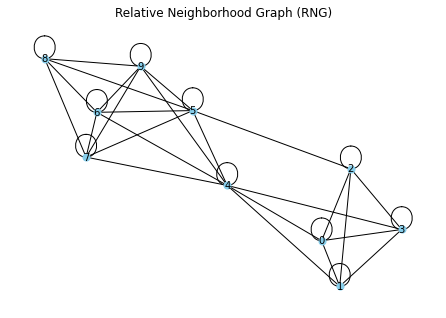

In [50]:
# Assuming 'rng' is the generated Relative Neighborhood Graph
pos = nx.spring_layout(rng)  # Position nodes using a spring layout
nx.draw(rng, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=10)

plt.title("Relative Neighborhood Graph (RNG)")
plt.show()


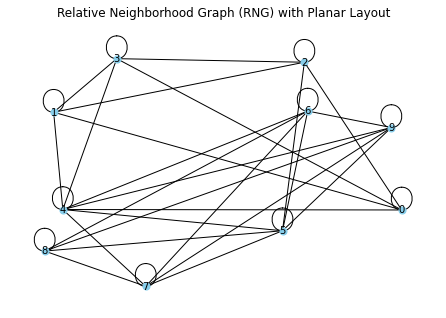

In [51]:
# Assuming 'rng' is your graph
pos = nx.random_layout(rng)

# Draw the graph
nx.draw(rng, pos=pos, with_labels=True, node_size=50, node_color='skyblue', font_size=10)

plt.title("Relative Neighborhood Graph (RNG) with Planar Layout")
plt.show()

In [52]:
rng.nodes()

NodeView((0, 3, 1, 2, 4, 5, 7, 6, 9, 8))